# Scikit-Learn 맛보기
### Iris 분류 - 결정 트리, 서포트벡터머신(SVM), 로지스틱 회귀

#### 1. 데이터 전처리

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
# Feature data - numpy dimensional array
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
type(iris.data), iris.data.shape

(numpy.ndarray, (150, 4))

In [9]:
# Feature name
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
# Target data - Y에 해당
iris.target[:5]

array([0, 0, 0, 0, 0])

In [12]:
import numpy as np
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [15]:
# iris.data에 2차원 데이터가 들어간다 , trarget에 y값이 들어감.
import pandas as pd
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
# 설명
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [18]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [19]:
df.groupby("target").describe()

sepal length (cm)                                              \
                   count   mean       std  min    25%  50%  75%  max   
target                                                                 
0                   50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1                   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2                   50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

       sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                  count   mean  ...               75%  max            count   
target                          ...                                           
0                  50.0  3.428  ...             1.575  1.9             50.0   
1                  50.0  2.770  ...             4.600  5.1             50.0   
2                  50.0  2.974  ...             5.875  6.9             50.0   

                                                  
         mean       std  min  25%  50%  75%  max  
target                                            
0       0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
1       1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
2       2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

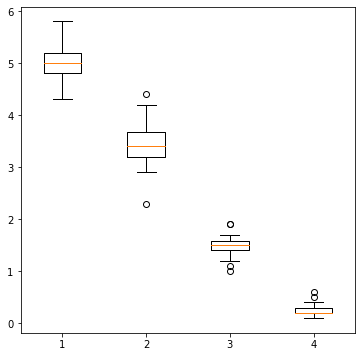

In [22]:
import matplotlib.pyplot as plt
setosa = df[df.target == 0].iloc[:,:-1]
plt.figure(figsize=(6,6))
plt.boxplot(setosa)
plt.show()

#### 2. 학습과 테스트 데이터로 분리

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size = 0.2, random_state = 2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [24]:
# de facto standard 사실상 표준
np.unique(y_train, return_counts = True)

(array([0, 1, 2]), array([36, 40, 44]))

In [25]:
# y 값을 균일하게 뽑으려면
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, test_size = 0.2, random_state = 2021
)
np.unique(y_train,return_counts = True)

(array([0, 1, 2]), array([40, 40, 40]))

# 학습
- Decision Tree (결정 트리)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
# 모델 생성 - 객체 생성
dtc = DecisionTreeClassifier(random_state = 2021)


In [29]:
# 학습(훈련)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

#### 4. 예측

In [30]:
pred_dt = dtc.predict(X_test)

In [32]:
res = pd.DataFrame({'y':y_test, "DT" : pred_dt})
res.head()

,y,DT
0,0,0
1,1,1
2,1,2
3,2,2
4,0,0


##### 5. 평가

In [33]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred_dt) # (y값, 예측값)
print(f"정확도(DT) : {acc:.4f}")

정확도(DT) : 0.9000


In [34]:
# 4, 5번을 한꺼번에 수행
dtc.score(X_test, y_test)

0.9

In [ ]:
# 01